#Importing all dependencies

In [0]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix 
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import torch
import math
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import pandas as pd
import io
import numpy as np

#Importing dataset to the local runtime

In [2]:
from google.colab import files
uploaded = files.upload()

Saving musk_csv.csv to musk_csv.csv


In [0]:
data = pd.read_csv('musk_csv.csv')

#DATA PREPROCESSING

In [4]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,3

In [6]:
data.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [0]:
data = data.drop(["molecule_name", "conformation_name"], axis = 1)

In [8]:
df = data.values
type(df)

numpy.ndarray

In [9]:
ss = StandardScaler()
ss.fit_transform(df)
data_norm = pd.DataFrame(df)
data_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167
0,1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


#MPNEURON CLASS(Our First Model)

In [0]:
class MPNeuron:
  
  def __init__ (self):
    self.b=None
    self.accuracy = {}
  
  def model(self,x):
    return(sum(x)>=self.b)
  
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
      
  def fit(self,X,Y,epochs=5):

    for e in tqdm_notebook(range(epochs), total=epochs, unit="epochs"):
      self.b

    for b in range(X.shape[1]+1):
      self.b=b
      Y_pred=self.predict(X)
      self.accuracy[b]=accuracy_score(Y_pred,Y)
      
    best_b = max(self.accuracy, key=self.accuracy.get)
    self.b=best_b
    
    print('optimal value of b is',best_b)
    print('highest accuracy is ', self.accuracy[best_b])

In [0]:
#plt.scatter(X_train[16], X_train[10],c=Y_train, cmap='viridis')

In [0]:
mpn = MPNeuron()

In [13]:
print(data_norm.shape)

(6598, 168)


In [0]:
Y = data_norm[167]
X = data_norm.drop([167],axis = 1)

In [111]:
print(X.shape)
print(Y.shape)

(6598, 167)
(6598,)


In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [113]:
type(X_train)

pandas.core.frame.DataFrame

In [0]:
X_train_val = X_train.values 
Y_train_val = Y_train.values 
X_test_val = X_test.values 
Y_test_val = Y_test.values 

***Output Metrics***

In [118]:
mpn.fit(X_train_val, Y_train_val)


optimal value of b is 164
highest accuracy is  0.7046229632436529


In [124]:
out_val = mpn.predict(X_test_val)
print("Output Accuracy",accuracy_score(out_val, Y_test_val))

Output Accuracy 0.6977272727272728


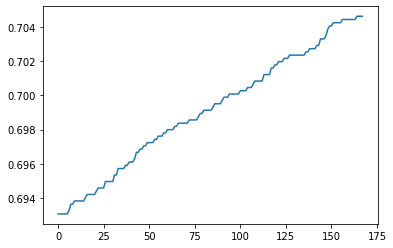

In [121]:
plt.plot(list(mpn.accuracy.keys()),list(mpn.accuracy.values()))
plt.show()

In [20]:
mpn.fit(X_test_val, Y_test_val)


optimal value of b is 164
highest accuracy is  0.7128787878787879


#PERCEPTRON CLASS(Our Second Model)

In [0]:
class Perceptron:
  def __init__ (self):
    self.w=None
    self.b=None
    self.accuracy = {}
  
  def model(self,x):
    return 1 if(np.dot(self.w,x)>=self.b) else 0
   
  def predict(self, X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self,X,Y,epochs=100,lr=1):
    
    self.w=np.ones(X.shape[1])
    self.b=0
    
    max_accuracy=0
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epochs"):
      self.b

    for i in range(epochs):
      for x,y in zip(X,Y):
        
        y_pred=self.model(x)
        if y==1 and y_pred==0:
          self.w=self.w+lr*x
          self.b=self.b+lr*1
      
        elif y==0 and y_pred==1:
          self.w=self.w-lr*x
          self.b=self.b-lr*1
       
      self.accuracy[i]=accuracy_score(self.predict(X),Y)
    
      if(self.accuracy[i]>max_accuracy):
        max_accuracy=self.accuracy[i]
        chkptw=self.w
        chkptb=self.b
       
    self.w=chkptw
    self.b=chkptb
    
    print(max_accuracy)

In [0]:
pptn = Perceptron()

In [134]:
pptn.fit(X_train_val,Y_train_val)


1.0


***Metrics***

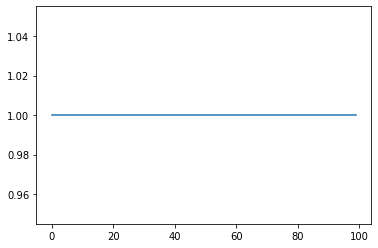

In [135]:
plt.plot(list(pptn.accuracy.keys()), list(pptn.accuracy.values()))

In [0]:
Y_test_pred = pptn.predict(X_test_val)

In [29]:
print(accuracy_score(Y_test_pred, Y_test_val))

1.0


In [30]:
X_train.shape

(5278, 167)

#Deep Neural Network(Our Third Model)

In [0]:
model = nn.Sequential(
    nn.Linear(167, 224),
    nn.Sigmoid(),
    nn.Linear(224,64),
    nn.Sigmoid(),
    nn.Linear(64, 8),
    nn.Sigmoid(),
    nn.Linear(8,2),
    nn.Softmax()
)

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr = 0.5)

In [0]:
X_train_tensor = torch.tensor(X_train_val).type(torch.FloatTensor)
Y_train_tensor = torch.tensor(Y_train_val).type(torch.FloatTensor)
X_test_tensor = torch.tensor(X_test_val).type(torch.FloatTensor)
Y_test_tensor = torch.tensor(Y_test_val).type(torch.FloatTensor)

In [0]:
epochs = 200
training_loss = []
for e in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
  running_loss = 0
  
  opt.zero_grad()
  output = model(X_train_tensor)
  loss = loss_fn(output, Y_train_tensor)

  loss.backward()
  opt.step()
        
  running_loss += loss.item()
  
  training_loss.append(running_loss)
  print(f"Training loss: {running_loss/len(Y_train_tensor)}")

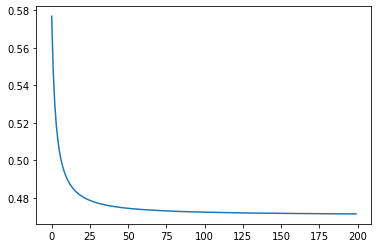

In [57]:
plt.plot(training_loss)
plt.show()

In [67]:
print(train_output.shape)
print(test_output.shape)
print(Y_train_val.shape)

torch.Size([5278, 2])
torch.Size([1320, 2])
(5278,)


In [73]:
type(train_output)

numpy.ndarray

In [74]:
print(train_output.shape)

(5278, 2)


***Metrics***

In [0]:
def evaluation(x_train, y_train):
    total, correct = 0, 0
    for x,y in zip(x_train, y_train):
        outputs = model(x)
        _, pred = torch.max(outputs.data, 0)
      
        correct += (pred == y).sum().item()
    return 100 * correct / len(y_train)

In [107]:
print("Accuracy on Train Data:", evaluation(X_train_tensor, Y_train_tensor))
print("Accuracy on Test Data:", evaluation(X_test_tensor, Y_test_tensor))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy on Train Data: 84.25539977264116
Accuracy on Test Data: 85.9090909090909
